# Lesson 3 - Integrals

If we know $f(0)$, and then we add all the infinite parts given by the derivative (the sum from before), we can "reconstruct" the original function.

We call this "reconstruction" the integral:

$$
f(x) = f(0) + \int f'dx
$$

Since we don't know $f$, we can't know $f(0)$, so we usually write that $f(0)$ is some real number $c$.

Using integrals, we can calculate the area under the function between two points $a$ and $b$:

$$
A = \int_{a}^{b} f = g(b) - g(a)
$$

Where $g$ is the antiderivative of $f$ (i.e. the integral).

## Numerically calculating integrals

We can numerically calculate the integrals by summating thin rectangles that span the x direction of $n, n+\Delta$ and have the height of $f(n)$. The area of each rectangle is therefore $f(n) * \Delta$.

By summating all rectangles spanning the space between $a$ and $b$, we can calculate an approximation of the integral:

$f(a)\Delta + f(a+\Delta)\Delta + f(a+2\Delta)\Delta + f(a+3\Delta)\Delta ... + f(a+n\Delta)\Delta \approx A$ until $a+(n+1)\Delta > b$. We can write this better:

$$
A \approx \sum_{n = 0}^{N} f(a + i \Delta) \Delta = \Delta \sum_{n = 0}^{N} f(a + i \Delta)
$$

We are not bound to setting a fixed value for $\Delta$ for the whole space of $a$, $b$. We could shrink $\Delta$ in places where the function is changing very rapidly, and have a larger $\Delta$ for places of the function where it changes more smoothly:

TODO: edit the formula below:
$$
A \approx \sum_{n = 0}^{N} f(a + i \Delta) \Delta
$$

In [1]:
import matplotlib.pylab as pl

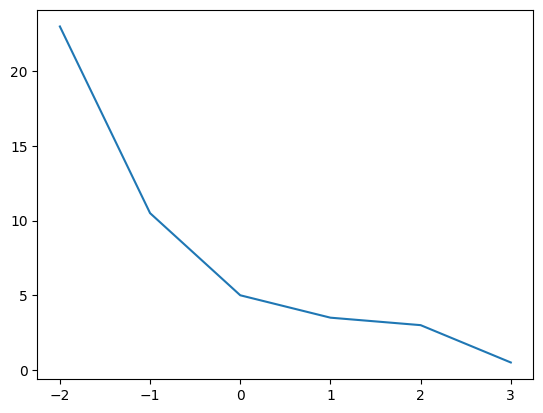

In [2]:
# Analyze the following polynomial

def fn1(x):
    return -0.5*x**3 + 2*x**2 - 3*x + 5

grainy_space = pl.linspace(-2, 3, 6)
# This grainy space is made up of 6 points, and thus five intervals,
# each of size 1: |start - stop| / (n_points-1)
pl.plot(grainy_space, fn1(grainy_space))

In [3]:
# We can calculate the delta:
delta = grainy_space[1] - grainy_space[0]
print(f"The delta is {delta}")

The delta is 1.0


In [4]:
# We have to apply the function from above, where we sum all the values at a step of Delta
# We already have them: as the space is delta-sized, we can just sum the values
# of the result of fn1(space), without the last point (we don't need a rectangle outside
# of the range of interest):
# To get rid of the last point, we can use this notation
print(f"Without the last point: {grainy_space[:-1]}")

print(f"Approximate area: {sum(fn1(grainy_space[:-1])) * delta}")

Without the last point: [-2. -1.  0.  1.  2.]
Approximate area: 45.0


In [5]:
# Another approach is to construct a rectangle from the other end,
# e.g of the height of f(x+delta), f(x+2delta) ...
# instead of f(x), f(x+delta)

# It is exactly the same as before, but we have to disregard the starting
# point, not the last:
print(f"Approximate area, from the other side:: {sum(fn1(grainy_space[1:])) * delta}")

Approximate area, from the other side:: 22.5


In [6]:
# Yet another way is to take the median value between f(x) and f(x + delta),
# and do the same for all the rectangles.
# We should get something between the other two approximations

# Let's shift the x values half a delta say, to the right:
fn1(grainy_space[:-1] + delta / 2)
# We have to get rid of the last point, as it would fall outside of b

# We can now run it again:
sum(fn1(grainy_space[:-1] + delta / 2)) * delta

32.1875

In [7]:
# As in all the other cases, we can use sympy to symbolically
# calculate the integral, to use to check our results:
import sympy as sp

x = sp.symbols("x")

sp.integrate(-0.5*x**3 + 2*x**2 - 3*x + 5)

-0.125*x**4 + 0.666666666666667*x**3 - 1.5*x**2 + 5.0*x

In [8]:
def anti_fn1(x):
    return -0.125*x**4 + 0.666666666666667*x**3 - 1.5*x**2 + 5.0*x

# We can now calculate the real area:
anti_fn1(grainy_space[-1]) - anti_fn1(grainy_space[0])
# The third approach got quite close to the real value!

32.70833333333334

32.708333332052085


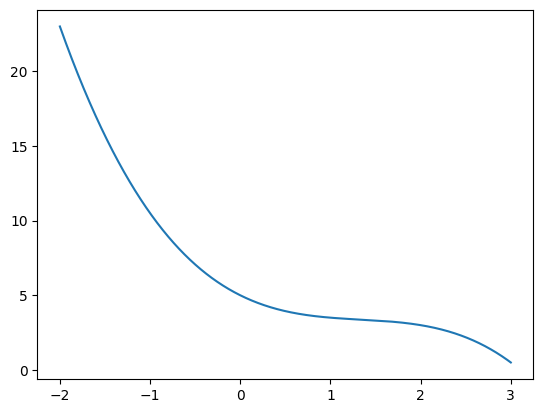

In [9]:
# Of course, with a smaller delta, we can get a more accurate answer.
# This is with the middle-point approach:
fine_space = pl.linspace(-2, 3, 100_000)
pl.plot(fine_space, fn1(fine_space))

fine_delta = fine_space[1] - fine_space[0]

print(sum(fn1(fine_space[:-1] + fine_delta / 2)) * fine_delta)
# An almost perfect match!

Some functions cannot be integrated, like $\frac{1}{\ln{x}}$.

We can run scypy to try and see its integral, but it will return just the integral itself.

In [10]:
sp.integrate(1 / sp.log(x))

li(x)

The `scipy` package implements this rectangle approach to integrate stuff, of course in an optimal way.

In [11]:
from scipy.integrate import quad

def fn2(x):
    return 1 / pl.log(x)

print(quad(fn2, 2, 4))
# It returns the approximate result, and an estimate of the error

# Let's see the differences of our method to `quad`
fine_space2 = pl.linspace(2, 4, 100_000)

fine_delta2 = fine_space2[1] - fine_space2[0]

print(sum(fn2(fine_space2[:-1] + fine_delta2 / 2)) * fine_delta2)
# An almost perfect match!

(1.922421314921558, 7.243357057809223e-14)
1.9224213148990712


### Exercise

Evaluate the quantity:

$$
\int_{0}^{15} x^2 * e^{-0.5 x} dx
$$

In [12]:
# Define our function
def fn_ex(x):
    return (x ** 2) * pl.exp(-0.5 * x)

# Define the space and our delta:

ex_spc = pl.linspace(0, 15, 100_000)
ex_delta = ex_spc[1] - ex_spc[0]

# Now try the three approaches
# 1 - rectangles on the left:
print(f"Left: {sum(fn_ex(ex_spc[:-1])) * ex_delta}")
# 2 - rectangles on the right:
print(f"Right: {sum(fn_ex(ex_spc[1:])) * ex_delta}")
# 3 - Rectangles in the center:
print(f"Center: {sum(fn_ex(ex_spc[:-1] + ex_delta / 2)) * ex_delta}")

# Symbolic calculation
print(sp.integrate((x ** 2) * sp.E**(-0.5 * x), x))

# Manual calc from sybolic evaluation
def anti_fn_ex(x):
    return (-2.0*x**2 - 8.0*x - 16.0)*pl.exp(-0.5*x)

print(f"Symbolic: {anti_fn_ex(15) - anti_fn_ex(0)}")

# Using quad
print(f"Quad: {quad(fn_ex, 0, 15)}")

Left: 15.675883225615625
Right: 15.675901892399784
Center: 15.675892559136171
1.0*(-2.0*x**2 - 8.0*x - 16.0)*exp(-0.5*x)
Symbolic: 15.67589255909337
Quad: (15.67589255909337, 6.140366137213867e-13)
